In [1]:
#import ecessary libaries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score

In [2]:
#import data
train_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Types of Variables:

Continuous: Age & Fare

Categorical: Sex & Embarked

Discrete: SibSp & Parch

Alphanumeric: Cabin


In [3]:
#lets understand the data  
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Check the null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

-> Ok so we have 177 null values in Age column.
-> 687 missing values in Cabin column.
-> 2 missing values in Embarked column.

# Plotting Heat Map 
To see the correlation between target variable and other parameters.


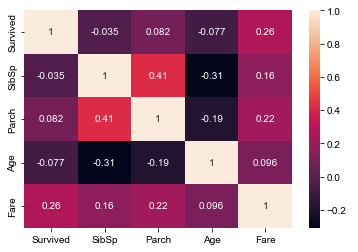

In [5]:
heatmap = sns.heatmap(train_data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)
sns.set(rc={'figure.figsize':(12,10)})

# Conclusion:
    Only Fare feature seems to have a significant correlation with the survival probability.



lets visualise the correlation of each variable with the target variable i.e, Survived.



# (A) SibSp - Number of Siblings / Spouses aboard the Titanic

In [6]:
# Finding unique values
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

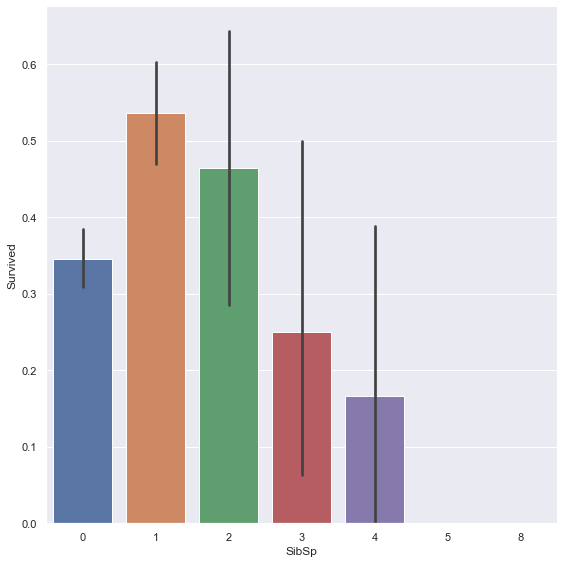

In [7]:
bargraph_sibsp = sns.catplot(x = "SibSp", y = "Survived", data = train_data, kind="bar", height = 8)

# Conclusion:

Passengers having 1 or 2 siblings have good chances of survival
More no. of siblings -> Less chances of survival

# 2) AGE

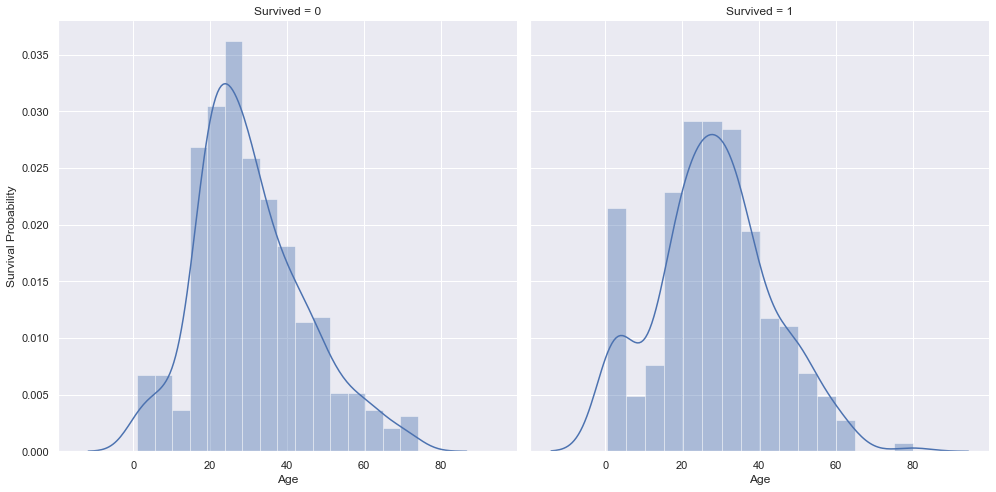

In [10]:
ageplot = sns.FacetGrid(train_data, col="Survived", height = 7)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")

# Conclusion

moreage less chance of surviaval

In [9]:
import warnings
warnings.filterwarnings('ignore')

# 3) Sex

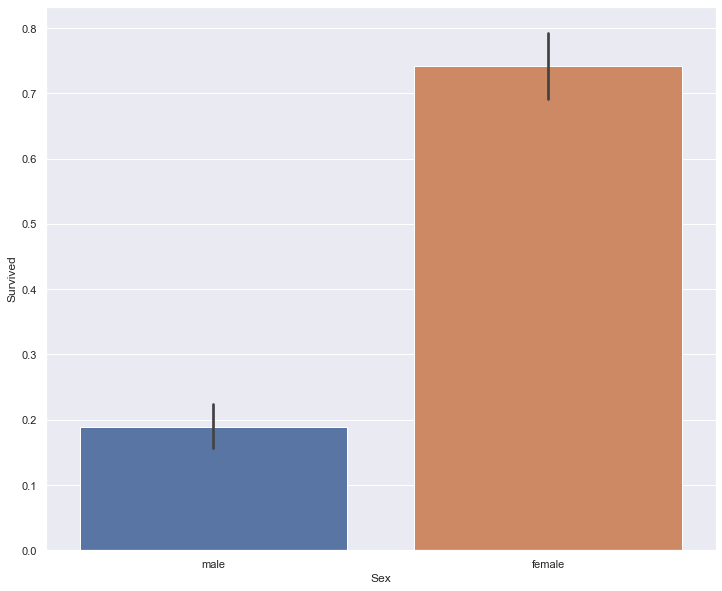

In [11]:
sexplot = sns.barplot(x="Sex", y="Survived", data=train_data)

# Conclusion:
    From the above graph it's quite obvious that females have more chances of survival in comparison to males.



# 4) Pclass

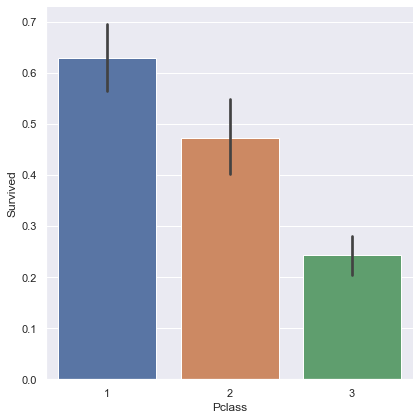

In [12]:
pclassplot = sns.catplot(x = "Pclass", y="Survived", data = train_data, kind="bar", height = 6)

# Conclusion
Higher class -> More chances of survival

# 5) Pclass vs Survived By Sex

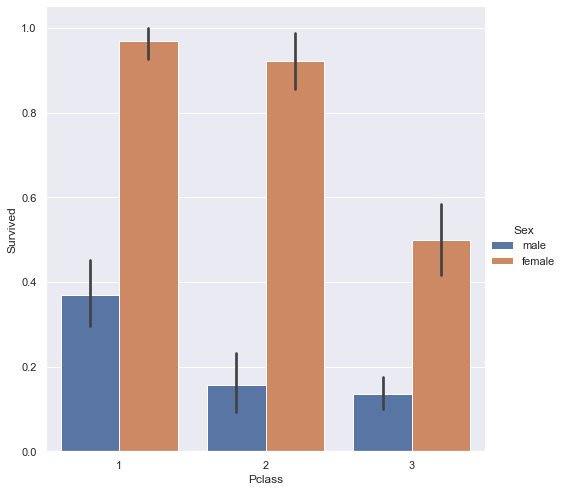

In [13]:
a = sns.catplot(x = "Pclass", y="Survived", hue="Sex", data=train_data, height = 7, kind="bar")

# Conclusion:

In each class females have much higher chances of survival in comparison to male passengers.

# 6) Embarked

In [14]:
train_data["Embarked"].isnull().sum()

2

In [15]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
# Filling 2 missing values with most frequent value i.e 'S'
train_data["Embarked"] = train_data["Embarked"].fillna('S')

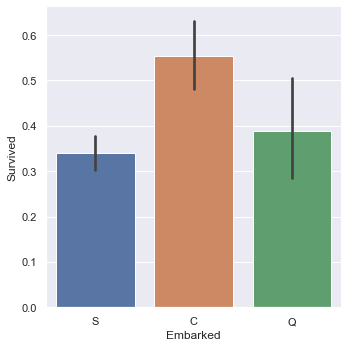

In [18]:
sns.catplot(x="Embarked", y="Survived", data=train_data, height = 5, kind="bar")

# 7) Pclass vs Survived by Embarked

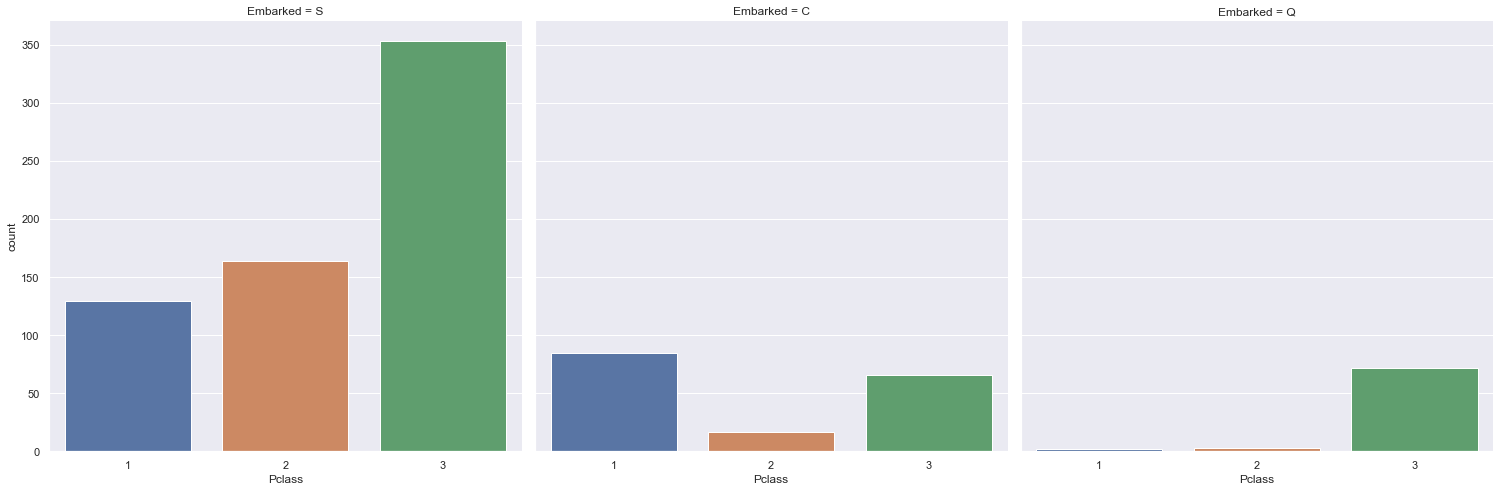

In [19]:
sns.catplot(x="Pclass", col="Embarked", data = train_data, kind="count", height=7)

Passengers embarked from C station, majority of them was from 1st class. That's why we got survival probability of C embarked passengers higher

# Data Preprocessing

In [20]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
#Lets fill age
mean = train_data["Age"].mean()
std = train_data["Age"].std()
print(mean)
print(std)

29.69911764705882
14.526497332334044


In [22]:
rand_age = np.random.randint(mean-std, mean+std, size = 177)
age_slice = train_data["Age"].copy()

age_slice[np.isnan(age_slice)] = rand_age
train_data["Age"] = age_slice
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [23]:
train_data['Age'] #null value is filled 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    23.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

# Now lets drop the columns 

In [29]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]


In [31]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,42.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


# Converting Categorical Variables to Numeric

In [32]:
genders = {"male":0, "female":1}
train_data["Sex"] = train_data["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
train_data["Embarked"] = train_data["Embarked"].map(ports)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Building Machine Learning Model 

In [33]:
df_train_x = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Target variable column
df_train_y = train_data[['Survived']]

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

In [40]:
clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)
rfc_y_pred = clf1.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("accuracy=",rfc_accuracy)

accuracy= 80.44692737430168


# Logistic Regression

In [41]:
clf2 = LogisticRegression()
clf2.fit(x_train, y_train)
lr_y_pred = clf2.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100

print("accuracy=",lr_accuracy)

accuracy= 80.44692737430168


# K-Neighbor Classifier

In [36]:
clf3 = KNeighborsClassifier(5)
clf3.fit(x_train, y_train)
knc_y_pred = clf3.predict(x_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100

print("accuracy=",knc_accuracy)

accuracy= 69.83240223463687


# Decision Tree Classifier

In [37]:
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(x_train, y_train)
dtc_y_pred = clf4.predict(x_test)
dtc_accuracy = accuracy_score(y_test,dtc_y_pred)*100

print("accuracy=",dtc_accuracy)

accuracy= 71.50837988826815


# Support Vector Machine

In [38]:
clf5 = svm.SVC()
clf5.fit(x_train, y_train)
svm_y_pred = clf5.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_y_pred)*100
print("accuracy=",svm_accuracy)

accuracy= 65.36312849162012


# Lets print all the accuracy which we got 


In [39]:
print("Accuracy of Random Forest Classifier =",rfc_accuracy)
print("Accuracy of Logistic Regressor =",lr_accuracy)
print("Accuracy of K-Neighbor Classifier =",knc_accuracy)
print("Accuracy of Decision Tree Classifier = ",dtc_accuracy)
print("Accuracy of Support Vector Machine Classifier = ",svm_accuracy)

Accuracy of Random Forest Classifier = 80.44692737430168
Accuracy of Logistic Regressor = 80.44692737430168
Accuracy of K-Neighbor Classifier = 69.83240223463687
Accuracy of Decision Tree Classifier =  71.50837988826815
Accuracy of Support Vector Machine Classifier =  65.36312849162012


In [48]:
test_data=(x_test,y_test)
test_data

(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 709       3    0  37.0      1      1  15.2458         1
 439       2    0  31.0      0      0  10.5000         0
 840       3    0  20.0      0      0   7.9250         0
 720       2    1   6.0      0      1  33.0000         0
 39        3    1  14.0      1      0  11.2417         1
 ..      ...  ...   ...    ...    ...      ...       ...
 433       3    0  17.0      0      0   7.1250         0
 773       3    0  16.0      0      0   7.2250         1
 25        3    1  38.0      1      5  31.3875         0
 84        2    1  17.0      0      0  10.5000         0
 10        3    1   4.0      1      1  16.7000         0
 
 [179 rows x 7 columns],
      Survived
 709         1
 439         0
 840         0
 720         1
 39          1
 ..        ...
 433         0
 773         0
 25          1
 84          1
 10          1
 
 [179 rows x 1 columns])

In [60]:
test_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
test_data=test_data.drop('Survived',axis=1)

In [64]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
# Replacing missing values of age column
mean = test_data["Age"].mean()
std = test_data["Age"].std()
rand_age = np.random.randint(mean-std, mean+std, size = 177)
age_slice = test_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
test_data["Age"] = age_slice

# Replacing missing value of Fare column
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
test_data["Embarked"] = test_data["Embarked"].fillna('S')

In [67]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [68]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
test_data.drop(col_to_drop, axis=1, inplace=True)
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,24.0,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [69]:
genders = {"male":0, "female":1}
test_data["Sex"] = test_data["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
test_data["Embarked"] = test_data["Embarked"].map(ports)

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [71]:
x_test = test_data
y_pred = clf1.predict(x_test)
originaltest_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
submission = pd.DataFrame({
        "PassengerId": originaltest_data["PassengerId"],
        "Survived": y_pred
    })
submission.head(20)

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
5,6,0
6,7,0
7,8,0
8,9,1
9,10,1
